# Hello Image Classification

This basic introduction to OpenVINO™ shows how to do inference with an image classification model.

A pre-trained [MobileNetV3 model](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/public/mobilenet-v3-small-1.0-224-tf/README.md) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../tensorflow-classification-to-openvino/tensorflow-classification-to-openvino.ipynb) tutorial.



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import openvino as ov

## 1. AI 추론을 실행할 디바이스 선택

In [2]:
import openvino as ov

core = ov.Core()
options=core.available_devices

options

['CPU', 'GPU']

* 작업 관리자에서 확인 가능

In [5]:
core = ov.Core()
model = core.read_model(model='./models/v3-small_224_1.0_float.xml')
compiled_model = core.compile_model(model=model, device_name="CPU")

input_layer = compiled_model.input()
output_layer = compiled_model.output()

print("input_layer_shape:", input_layer.shape)
print("out_layer_shape:", output_layer.shape)

input_layer_shape: [1,224,224,3]
out_layer_shape: [1,1001]


## 2. AI 모델 불러오기 및 입출력 형태 확인

In [6]:
core = ov.Core()
model = core.read_model(model='./models/v3-small_224_1.0_float.xml')
compiled_model = core.compile_model(model=model, device_name="CPU")

input_layer = compiled_model.input()
output_layer = compiled_model.output()

print("input_layer_shape:", input_layer.shape)
print("out_layer_shape:", output_layer.shape)

input_layer_shape: [1,224,224,3]
out_layer_shape: [1,1001]


* 제공된 코드 처음 시작 부분에서 확인 가능

A pre-trained [MobileNetV3 model](https://github.com/openvinotoolkit/open_model_zoo/blob/master/models/public/mobilenet-v3-small-1.0-224-tf/README.md) from [Open Model Zoo](https://github.com/openvinotoolkit/open_model_zoo/) is used in this tutorial. For more information about how OpenVINO IR models are created, refer to the [TensorFlow to OpenVINO](../tensorflow-classification-to-openvino/tensorflow-classification-to-openvino.ipynb) tutorial.


https://docs.openvino.ai/2024/omz_models_model_mobilenet_v3_small_1_0_224_tf.html 

## 3. AI 추론 준비: 데이터 전처리 

- 데이터 전처리: 새로 입력될 데이터 입력 형태 맞추기 <br>
  input_layer_shape: [1,224,224,3]


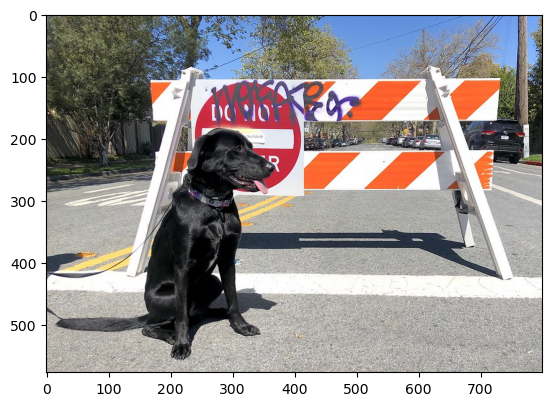

In [7]:
image = cv2.cvtColor(cv2.imread('./data/coco.jpg'), code=cv2.COLOR_BGR2RGB)
# 입력된 새로운 이미지 데이터 크기를 AI 모델 입력 크기로 변환
input_image = cv2.resize(src=image, dsize=(224, 224))
# AI 모델 입력 형태에 맞게 차원 확장 하기
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

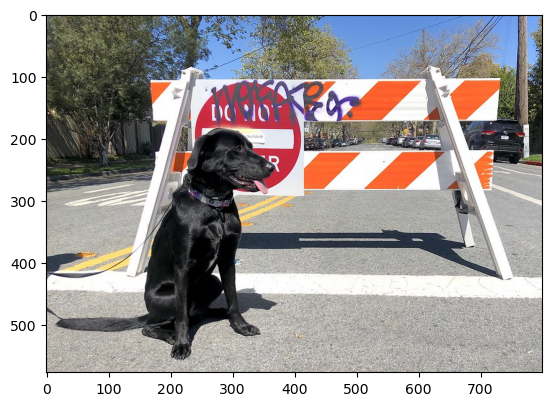

In [8]:
import cv2

image = cv2.cvtColor(cv2.imread('./data/coco.jpg'), code=cv2.COLOR_BGR2RGB)
# 입력된 새로운 이미지 데이터 크기를 AI 모델 입력 크기로 변환
input_image = cv2.resize(src=image, dsize=(224, 224))
# AI 모델 입력 형태에 맞게 차원 확장 하기
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

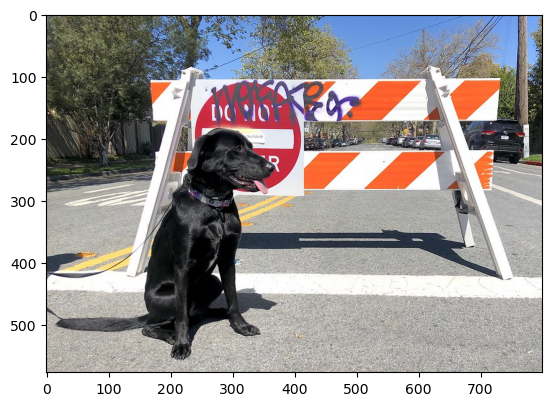

In [9]:
import cv2
import numpy as np

image = cv2.cvtColor(cv2.imread('./data/coco.jpg'), code=cv2.COLOR_BGR2RGB)
# 입력된 새로운 이미지 데이터 크기를 AI 모델 입력 크기로 변환
input_image = cv2.resize(src=image, dsize=(224, 224))
# AI 모델 입력 형태에 맞게 차원 확장 하기
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);

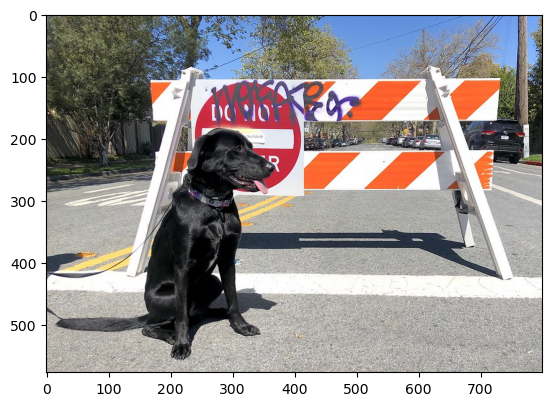

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.cvtColor(cv2.imread('./data/coco.jpg'), code=cv2.COLOR_BGR2RGB)
# 입력된 새로운 이미지 데이터 크기를 AI 모델 입력 크기로 변환
input_image = cv2.resize(src=image, dsize=(224, 224))
# AI 모델 입력 형태에 맞게 차원 확장 하기
input_image = np.expand_dims(input_image, 0)
plt.imshow(image);
#plt.imshow(input_image);

## 4. AI 추론

- input_image
- compiled_model
- output_layer


In [11]:
result_infer = compiled_model([input_image])[output_layer]
result_index = np.argmax(result_infer)
result_index

206

In [12]:
result_infer

array([[3.8589977e-05, 1.9022524e-05, 2.3226594e-04, ..., 2.3366818e-05,
        1.9658433e-05, 1.5064742e-05]], dtype=float32)

In [13]:
def count_elements_in_numpy_array(result_infer):
    return result_infer.size
print(count_elements_in_numpy_array(result_infer))

1001


In [14]:
[output_layer]

[<ConstOutput: names[MobilenetV3/Predictions/Softmax:0] shape[1,1001] type: f32>]

In [15]:
[input_image]

[array([[[[ 89,  97, 106],
          [ 98, 115,  98],
          [ 91, 110, 120],
          ...,
          [119, 163, 237],
          [121, 168, 241],
          [143, 146, 159]],
 
         [[ 93, 105, 120],
          [111, 120, 125],
          [ 83,  95,  94],
          ...,
          [118, 163, 237],
          [111, 162, 246],
          [130, 148, 169]],
 
         [[ 89, 107, 113],
          [ 80,  86,  81],
          [116, 121, 104],
          ...,
          [117, 168, 236],
          [118, 158, 215],
          [109, 113, 100]],
 
         ...,
 
         [[173, 170, 165],
          [206, 203, 196],
          [190, 187, 178],
          ...,
          [176, 175, 171],
          [211, 210, 206],
          [167, 166, 162]],
 
         [[183, 180, 175],
          [178, 174, 168],
          [189, 186, 177],
          ...,
          [135, 134, 130],
          [158, 157, 153],
          [157, 156, 151]],
 
         [[216, 213, 207],
          [179, 176, 169],
          [168, 165, 157],
   

In [18]:
def get_element_at_position(result_infer, row, col):
    return result_infer[row, col]

# 예시: 0번째 행, 2번째 열의 값을 출력
print(get_element_at_position(result_infer, 0, 206))

0.76442134


In [19]:
def compare_numbers(a, b):
    if a > b:
        return f"{a} is greater than {b}"
    elif a < b:
        return f"{b} is greater than {a}"
    else:
        return f"{a} is equal to {b}"

# 숫자 비교
num1 = 3.761053e-05
num2 = 0.77001953

print(compare_numbers(num1, num2))

0.77001953 is greater than 3.761053e-05


## 5. AI 추론 결과 출력

- 추론 결과 해석
- 추론 결과 출력


In [20]:
from pathlib import Path
imagenet_filename = Path('./data/imagenet_2012.txt')
#print(imagenet_filename)
imagenet_classes = imagenet_filename.read_text().splitlines()
#print(imagenet_classes)

In [21]:
# The model description states that for this model, class 0 is a background.
# Therefore, a background must be added at the beginning of imagenet_classes.

imagenet_classes = ["background"] + imagenet_classes
#print(imagenet_classes)
imagenet_classes[result_index]

'n02099267 flat-coated retriever'

https://www.image-net.org/challenges/LSVRC/2012/browse-synsets.php 